In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

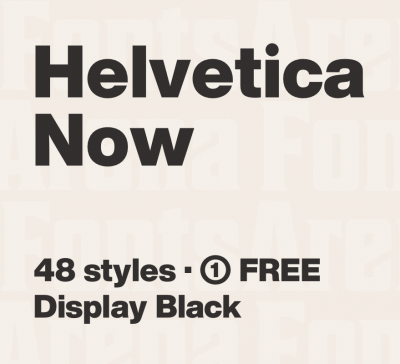

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

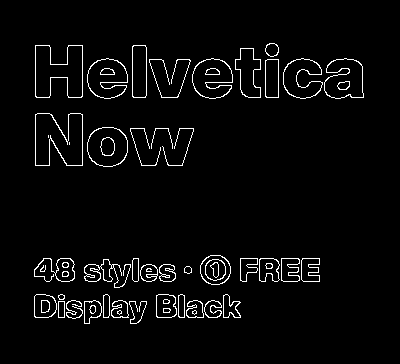

In [0]:
cv2_imshow(edges)

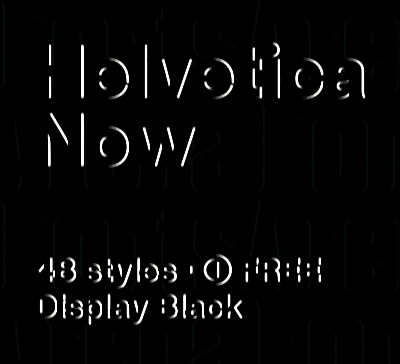

In [0]:
# kernel = np.ones((3,3),np.float32)/20
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

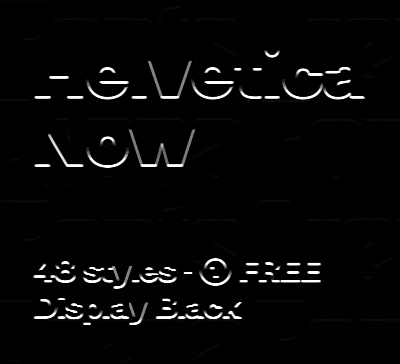

In [0]:
# For horizontal edge detector, we need to just transpose the kernel for vertical edge detector
# as you can imagine horizontal line is the transpose of vertical line

hori_kernel = np.float32([[-1, -1, -1], 
                          [0, 0, 0], 
                          [1, 1, 1]])
dst_h =  cv2.filter2D(image, -1, hori_kernel)
cv2_imshow(dst_h)

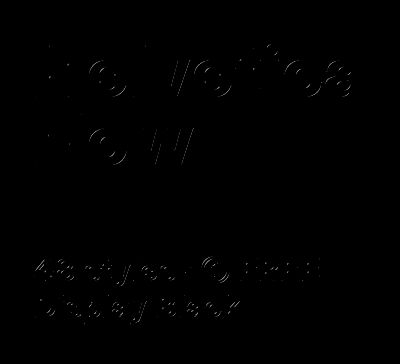

In [0]:
# first I tried with kernels weights containing of 1, 0 and -1, but, the lines 
# are too light. So, to increase the sharpness I multiplied the weights by 10.
# The output in next cell much more clearer.
angle_kernel = np.float32([[1, 0, -1],
                           [0, -1, 0],
                           [-1, 0, 1]])
dst_a =  cv2.filter2D(image, -1, angle_kernel)
cv2_imshow(dst_a)

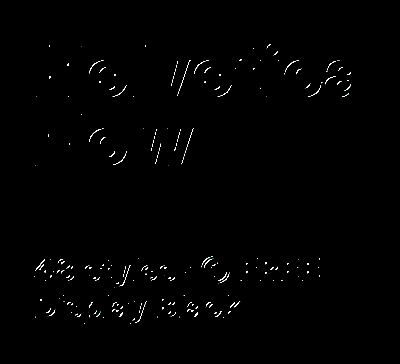

In [0]:
''' 
I couldn't find a proper logic for this kernel. I just played with 5x5 image 
size with a 45 degree line in it and computed how the image should change so as
to detect the 45 degree line and accordingly devised this kernel.
'''
angle_kernel = np.float32([[10, 0, -10],
                           [0, -10, 0], 
                           [-10, 0, 10]])
dst_a =  cv2.filter2D(image, -1, angle_kernel)
cv2_imshow(dst_a)

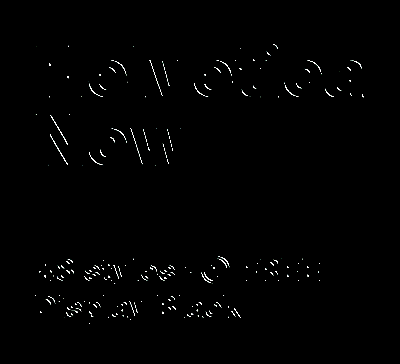

In [0]:
# the above one cell detects 45 degree edges. This one detects 135 degree angle
other_angle_kernel = np.float32([[-10, 0, 10], 
                                 [0, -10, 0],
                                 [10, 0, -10]])
dst_a =  cv2.filter2D(image, -1, other_angle_kernel)
cv2_imshow(dst_a)

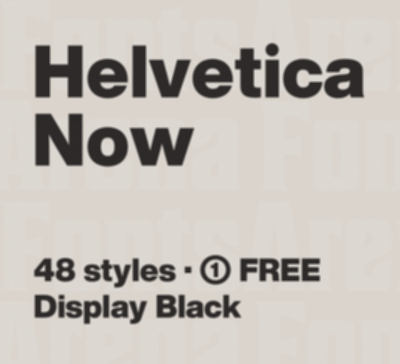

In [0]:
'''
to blur the image, we need to reduce the differnce between the two colours here,
which is black and creamish white. One easy way could be to reduce the magnitude
of each pixel by some number. It does make it a bit blur
'''
blur_kernel = np.ones((3,3),np.float32)/10
dst_b =  cv2.filter2D(image, -1, blur_kernel)
cv2_imshow(dst_b)

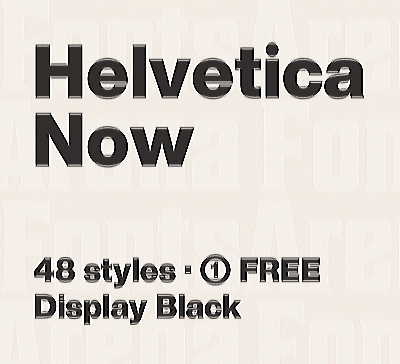

In [0]:
'''
Another kernel to blur an image which I found by random
hit and trial
'''
gblur_kernel = np.float32([[0, 1, 0],
                           [-2, 3, -2],
                           [0, 1, 0]])
dst_gb =  cv2.filter2D(image, -1, gblur_kernel)
cv2_imshow(dst_gb)

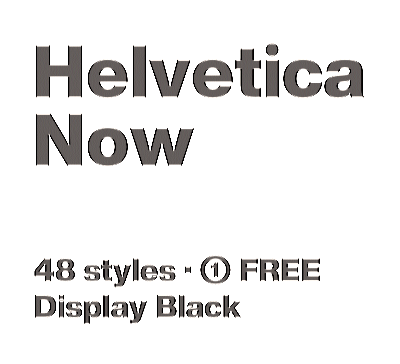

In [0]:
'''
for sharpening an image, one needs to increase the pixel differnce betweeen the two 
colours. Again, taking a simple 4x4 matrix for image, I visualized this kernel
which would increase the difference between the two colours
'''
sharp_kernel = np.float32([[0, 1, 0],
                           [-2, 4, -2],
                           [0, 1, 0]])
dst_s =  cv2.filter2D(image, -1, sharp_kernel)
cv2_imshow(dst_s)

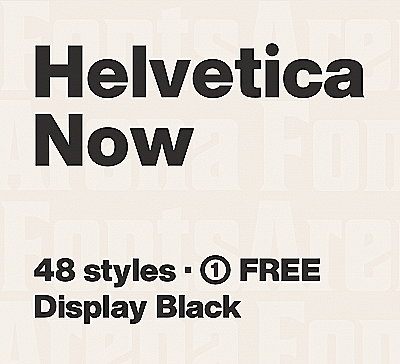

In [0]:
'''
let's check a sharpening kernel which I found online.
This seems to be much better than what I did above. 
'''
sharp_kernel = np.float32([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
dst_s =  cv2.filter2D(image, -1, sharp_kernel)
cv2_imshow(dst_s)

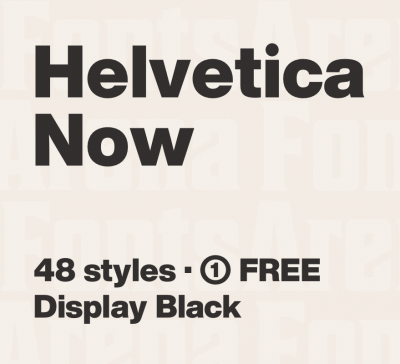

In [0]:
# identity function
identity_kernel = np.float32([[0, 0, 0],
                              [0, 1, 0],
                              [0, 0, 0]])
dst_i =  cv2.filter2D(image, -1, identity_kernel)
cv2_imshow(dst_i)